<h1><center>Exploring the Impacts of Covid-19</center></h1>
<p><center>DS 7331</center></p>
<p><center>Created by Sadik Aman, Dawn Bowerman, Zachary Harris, Alexandre Jasserme</center></p>


## Business Understanding

### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?)

This dataset is published in the 'Our World in Data' website which is a collection of existing datasets. 
Source: https://github.com/owid/covid-19-data/tree/master/public/data 
Citation:
Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

>This dataset was partially obtained from:
The Covid-19 Data Repository which is for the Coronavirus Visual Dashboard by the Center for Systems Science and Engineering at Johns Hopkins University.  The data has been accumulated from many official sources, which are documented on the github, since January 22, 2020 on confirmed Covid-19 cases and deaths for all countries.  https://github.com/CSSEGISandData/COVID-19
Other attributes were from official government reports documented in the codebook. There were originally 67 attributes and 154,105 records.  They are presented below with descriptions from the website:

>**Confirmed cases**                                                      
total_cases: 	                               		Total confirmed cases of COVID-19,
new_cases: 				New confirmed cases of COVID-19<br>
new_cases_smoothed:			New confirmed cases of COVID-19 (7-day smoothed)<br>
total_cases_per_million: 			Total confirmed cases of COVID-19 per 1,000,000 people<br>
new_cases_per_million: 			New confirmed cases of COVID-19 per 1,000,000 people<br>
new_cases_smoothed_per_million: 		New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people<br>


>**Confirmed deaths**<br>
total_deaths: 				Total deaths attributed to COVID-19<br>
new_deaths: 				New deaths attributed to COVID-19<br>
new_deaths_smoothed: 			New deaths attributed to COVID-19 (7-day smoothed)<br>
total_deaths_per_million: 			Total deaths attributed to COVID-19 per 1,000,000 people<br>
new_deaths_per_million: 			New deaths attributed to COVID-19 per 1,000,000 people<br>
new_deaths_smoothed_per_million: 		New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people<br>



>**Excess mortality**<br>
excess_mortality: 				Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the 							projected number of deaths for the same period based on previous years.<br> 
excess_mortality_cumulative: 			Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative 						projected deaths for the same period based on previous years.<br> 
excess_mortality_cumulative_absolute: 		Cumulative difference between the reported number of deaths since 1 January 2020 and the projected 							number of deaths for the same period based on previous years.<br> 
excess_mortality_cumulative_per_million: 	Cumulative difference between the reported number of deaths since 1 January 2020 and the projected 							number of deaths for the same period based on previous years, per million people.<br> 


>**Hospital & ICU**<br>
icu_patients: 				Number of COVID-19 patients in intensive care units (ICUs) on a given day<br>
icu_patients_per_million: 			Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people<br>
hosp_patients: 				Number of COVID-19 patients in hospital on a given day<br>
hosp_patients_per_million: 			Number of COVID-19 patients in hospital on a given day per 1,000,000 people<br>
weekly_icu_admissions: 			Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week<br>
weekly_icu_admissions_per_million: 		Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 					people<br>
weekly_hosp_admissions: 			Number of COVID-19 patients newly admitted to hospitals in a given week<br>
weekly_hosp_admissions_per_million: 		Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people<br>


>**Policy responses**<br>
stringency_index: 				Government Response Stringency Index: composite measure based on 9 response indicators including 							school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest 							response)<br>

>**Reproduction rate**<br>
reproduction_rate:				Real-time estimate of the effective reproduction rate (R) of COVID-19.<br>


>**Tests & positivity**<br>
total_tests: 				Total tests for COVID-19<br>
new_tests: 				New tests for COVID-19 (only calculated for consecutive days)<br>
total_tests_per_thousand: 			Total tests for COVID-19 per 1,000 people<br>
new_tests_per_thousand: 			New tests for COVID-19 per 1,000 people<br>
new_tests_smoothed: 			New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we 							assume that testing changed equally on a daily basis over any periods in which no data was reported. This 							produces a complete series of daily figures, which is then averaged over a rolling 7-day window<br>
new_tests_smoothed_per_thousand: 		New tests for COVID-19 (7-day smoothed) per 1,000 people<br>
positive_rate: 				The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of 					tests_per_case)<br>
tests_per_case: 				Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of 					positive_rate)<br>
tests_units: 				Units used by the location to report its testing data<br>


>**Vaccinations**<br>
total_vaccinations: 				Total number of COVID-19 vaccination doses administered<br>
people_vaccinated: 				Total number of people who received at least one vaccine dose<br>
people_fully_vaccinated: 			Total number of people who received all doses prescribed by the vaccination protocol<br>
total_boosters: 				Total number of COVID-19 vaccination booster doses administered (doses administered beyond the 							number prescribed by the vaccination protocol)<br>
new_vaccinations: 				New COVID-19 vaccination doses administered (only calculated for consecutive days)<br>
new_vaccinations_smoothed: 			New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report 							vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any 							periods in which no data was reported. This produces a complete series of daily figures, which is then 							averaged over a rolling 7-day window<br>
total_vaccinations_per_hundred: 		Total number of COVID-19 vaccination doses administered per 100 people in the total population<br>
people_vaccinated_per_hundred: 		Total number of people who received at least one vaccine dose per 100 people in the total population<br>
people_fully_vaccinated_per_hundred: 		Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the 					total population<br>
total_boosters_per_hundred: 			Total number of COVID-19 vaccination booster doses administered per 100 people in the total population<br>
new_vaccinations_smoothed_per_million: 	New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total 							population<br>
new_people_vaccinated_smoothed: 		Daily number of people receiving their first vaccine dose (7-day smoothed)<br>
new_people_vaccinated_smoothed_per_hundred: 	Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total 							population<br>


>**Others**<br>
iso_code: 					ISO 3166-1 alpha-3 – three-letter country codes<br>
continent: 					Continent of the geographical location<br>
location: 					Geographical location<br>
date: 					Date of observation<br>
population: 				Population (latest available values)<br> 
population_density: 				Number of people divided by land area, measured in square kilometers, most recent year available<br>
median_age: 				Median age of the population, UN projection for 2020<br>
aged_65_older: 				Share of the population that is 65 years and older, most recent year available<br>
aged_70_older: 				Share of the population that is 70 years and older in 2015<br>
gdp_per_capita: 				Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year 						available<br>
extreme_poverty: 				Share of the population living in extreme poverty, most recent year available since 2010<br>
cardiovasc_death_rate: 			Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)<br>
diabetes_prevalence: 			Diabetes prevalence (% of population aged 20 to 79) in 2017<br>
female_smokers: 				Share of women who smoke, most recent year available<br>
male_smokers: 				Share of men who smoke, most recent year available<br>
handwashing_facilities: 			Share of the population with basic handwashing facilities on premises, most recent year available<br>
hospital_beds_per_thousand: 			Hospital beds per 1,000 people, most recent year available since 2010<br>
life_expectancy: 				Life expectancy at birth in 2019<br>
human_development_index: 			A composite index measuring average achievement in three basic dimensions of human development—a 							long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from 							http://hdr.undp.org/en/indicators/137506<br>

**Describe how you would define and measure the outcomes from the dataset**<br>
**Why is the dataset important?** -- The SARS-CoV-2 virus causes an infectious disease called Coronavirus (COVID-19).  It was  first identified in December of 2019, and its' spread has grown to become a pandemic affecting millions of people by causing sickness, death, and overburdening healthcare systems around the world.  It has also caused public fear, anxiety, and economic stability as well as political strife over mask mandates, school closures, and travel restrictions, etc.  Discovering the best way to avoid becoming infected, or dying from this disease has become a top priority. 

**How do you know if you have mined useful knowledge from the dataset?**<br>
Demonstrating a relationship or association between a certain field or group of attributes in the dataset with the likelihood of contracting the disease or dying from it would be extremely useful information. We have selected the fields; **new_cases, new_deaths, new_deaths_smoothed and weekly_hosp_admissions** as our predictor attributes as we feel that the relationship between the other attributes that cause these numbers to increase or decrease could predict the number of future new cases or new deaths.<br>

**How would you measure the effectiveness of a good prediction algorithm?**<br>
**We can evaluate the precision and accuracy of our derived model by using the metrics; mean squared error (MSE), Root MSE, and mean absolute error (MAE), and cross validation to estimate the competency of the computed algorithm in making predictions on unseen data.   Demonstrating a relationship or association between a certain field or group of attributes with the likelihood of contracting the disease or dying from it would be extremely useful in that it would be best to avoid.  
Note: To put it in short, if there are many outliers then you may consider using Mean Absolute Error (also called the Average Absolute Deviation). RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.**








## Data Meaning Type - Zachary




The source dataset contains 154105 observations and 67 attributes. As there are attributes in this dataset that are updated daily, the data used in this report was downloaded from the source on January 15, 2022 at 1:00 PM CST. In order to analyze the data for this report, some attributes in the dataset were manipulated or eliminated. Table 1 outlines the final list of attributes used for this report and descriptions for each.

**Edit list below**

<p><center>Table 1</center></p>

| Variable Name                  | Data Type | Description                                                                                                                                                                                                                                                                                                                                           |
|--------------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| continent                      | object    | Continent of the geographical location                                                                                                                                                                                                                                                                                                                |
| location                       | object    | Geographical location                                                                                                                                                                                                                                                                                                                                 |
| date                           | object    | Date of observation                                                                                                                                                                                                                                                                                                                                   |
| new_cases                      | numerical | New confirmed cases of COVID-19                                                                                                                                                                                                                                                                                                                       |
| new_cases_smoothed             | numerical | New confirmed cases of COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                      |
| new_deaths                     | numerical | New deaths attributed to COVID-19                                                                                                                                                                                                                                                                                                                     |
| new_deaths_smoothed            | numerical | New deaths attributed to COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                    |
| reproduction_rate              | numerical | Real-time estimate of the effective reproduction rate (R) of COVID-19                                                                                                                                                                                                                                                                                 |
| new_tests                      | numerical | New tests for COVID-19 (only calculated for consecutive days)                                                                                                                                                                                                                                                                                         |
| new_tests_smoothed             | numerical |                                                                                                                                                                                                                                                                                                                                                       |
| positive_rate                  | numerical | The share of COVID-19 tests that are positive,  given as a rolling 7-day average (this is the inverse of tests_per_case)                                                                                                                                                                                                                              |
| tests_per_case                 | numerical | Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average  (this is the inverse of positive_rate)                                                                                                                                                                                                                          |
| people_fully_vaccinated        | numerical | Total number of people who received all doses prescribed by the vaccination protocol                                                                                                                                                                                                                                                                  |
| new_vaccinations               | numerical | New COVID-19 vaccination doses administered (only calculated for consecutive days)                                                                                                                                                                                                                                                                    |
| new_vaccinations_smoothed      | numerical | New COVID-19 vaccination doses administered (7-day smoothed).  For countries that don't report vaccination data on a daily basis,  we assume that vaccination changed equally on a daily basis over any periods in which  no data was reported. This produces a complete series of daily figures, which is  then averaged over a rolling 7-day window |
| new_people_vaccinated_smoothed | numerical | Daily number of people receiving their first vaccine dose (7-day smoothed)                                                                                                                                                                                                                                                                            |
| stringency_index               | numerical | Government Response Stringency Index: composite measure based on 9 response  indicators including school closures, workplace closures,  and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)                                                                                                                                 |
| population                     | numerical | Population                                                                                                                                                                                                                                                                                                                                            |
| population_density             | numerical | Number of people divided by land area, measured in square kilometers,  most recent year available                                                                                                                                                                                                                                                     |
| median_age                     | numerical | Median age of the population, UN projection for 2020                                                                                                                                                                                                                                                                                                  |
| aged_65_older                  | numerical | Share of the population that is 65 years and older, most recent year available                                                                                                                                                                                                                                                                        |
| aged_70_older                  | numerical | Share of the population that is 70 years and older in 2015                                                                                                                                                                                                                                                                                            |
| gdp_per_capita                 | numerical | Gross domestic product at purchasing power parity  (constant 2011 international dollars),  most recent year available                                                                                                                                                                                                                                 |
| extreme_poverty                | numerical | Share of the population living in extreme poverty,  most recent year available since 2010                                                                                                                                                                                                                                                             |
| cardiovasc_death_rate          | numerical | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                                                                                                                                           |
| diabetes_prevalence            | numerical | Diabetes prevalence (% of population aged 20 to 79) in 2017                                                                                                                                                                                                                                                                                           |
| female_smokers                 | numerical | Share of women who smoke, most recent year available                                                                                                                                                                                                                                                                                                  |
| male_smokers                   | numerical | Share of men who smoke, most recent year available                                                                                                                                                                                                                                                                                                    |
| handwashing_facilities         | numerical | Share of the population with basic handwashing facilities on premises,  most recent year available                                                                                                                                                                                                                                                    |
| hospital_beds_per_thousand     | numerical | Hospital beds per 1,000 people, most recent year available since 2010                                                                                                                                                                                                                                                                                 |
| life_expectancy                | numerical | Life expectancy at birth in 2019                                                                                                                                                                                                                                                                                                                      |
| human_development_index        | numerical | A composite index measuring average achievement in three basic  dimensions of human development—a long and healthy life,  knowledge and a decent standard of living.                                                                                                                                                                                  |

In [1]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

In [2]:
#Import covid dataset from CSV File

covid_data = pd.read_csv('data/owid-covid-data.csv')

**Place reasons for eliminated attributes here**

The description of all 67 fields of the data attributes can be found at https://ourworldindata.org/coronavirus. We only used 37 of the 67 attributes because a lot of the attributes were daily total which didn't work well for predictions and they had daily current counts that worked better.  Also, some of the attributes , like tests_units would not be relevant to predictions.  A few of the fields, such as excess_mortality, total_boosters, weekly_hospital_admissions, and weekly_icu admissions had so many missing entries that they were useless.

In [3]:
#Eliminated Attributes

#0 iso_code 
#4 total_cases 
#7 total_deaths 
#10 total_cases_per_million
#11 new_cases_per_million 
#12 new_cases_smoothed_per_million 
#13 total_deaths_per_million
#14 total_death_per_million
#15 new_deaths_smoothed_per_million
#17  icu_patients
#18 icu_patients_per_million  
#19  hosp_patients 
#20 hosp_patients_per_million
#21  weekly_icu_admissions
#22  weekly_icu_admissions_per_million
#23  weekly_hosp_admissions
#24  weekly_hosp_admissions_per_million
#25 new_tests
#26 total_tests
#27 total_tests_per_thousand 
#28  new_tests_per_thousand
#29 new_tests_smoothed 
#30  new_tests_smoothed_per_thousand
#31 positive_rate
#32 tests_per_case 
#33  tests_units 
#34 total_vaccinations
#35 people_vaccinated
#36 people_fully_vaccinated
#37 total_boosters
#38 new_vaccinations
#40 total_vaccinations_per_hundred 
#41 people_vaccinated_per_hundred
#42  people_fully_vaccinated_per_hundred         
#43  total_boosters_per_hundred                 
#44  new_vaccinations_smoothed_per_million 
#46 new_people_vaccinated_smoothed_per_hundred
#54 extreme_poverty 
#57 female_smokers                  
#58 male_smokers  
#63  excess_mortality_cumulative_absolute  
#64  excess_mortality_cumulative
#65  excess_mortality 
#66 excess_mortality_cumulative_per_million                                                                                                             
                  

In [4]:
#Original Source Data

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154105 entries, 0 to 154104
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    154105 non-null  object 
 1   continent                                   144825 non-null  object 
 2   location                                    154105 non-null  object 
 3   date                                        154105 non-null  object 
 4   total_cases                                 151434 non-null  float64
 5   new_cases                                   151379 non-null  float64
 6   new_cases_smoothed                          150228 non-null  float64
 7   total_deaths                                134139 non-null  float64
 8   new_deaths                                  134314 non-null  float64
 9   new_deaths_smoothed                         134182 non-null  float64
 

In [5]:
#Drop Attributes

covid_data_alt = covid_data.drop(covid_data.columns[[0,4,7,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,
                                                     27,28,29,30,31,32,
                                                     33,34,35,36,37,38,40,41,42,43,44,46,54,57,58,63,64,65,66]], axis=1)

In [6]:
covid_data_alt['continent'].replace('', np.nan, inplace=True)
covid_data_alt.dropna(subset=['continent'], inplace=True)
covid_data_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144825 entries, 0 to 154104
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   continent                       144825 non-null  object 
 1   location                        144825 non-null  object 
 2   date                            144825 non-null  object 
 3   new_cases                       142099 non-null  float64
 4   new_cases_smoothed              141025 non-null  float64
 5   new_deaths                      125047 non-null  float64
 6   new_deaths_smoothed             124987 non-null  float64
 7   reproduction_rate               115546 non-null  float64
 8   new_vaccinations_smoothed       68313 non-null   float64
 9   new_people_vaccinated_smoothed  67345 non-null   float64
 10  stringency_index                120783 non-null  float64
 11  population                      144508 non-null  float64
 12  population_densi

In [7]:
print(covid_data_alt.date.min())
print(covid_data_alt.date.max())
covid_data_alt.dropna(subset=['continent'], inplace=True)

2020-01-01
2022-01-12


In [8]:
# Remove Dates before July 1st, 2021 and after December 31, 2021
covid_data_restricted_dates = covid_data_alt[covid_data_alt.date >= '2021-07-01']
covid_data_restricted_dates = covid_data_restricted_dates[covid_data_restricted_dates.date <= '2022-01-01']
covid_data_restricted_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40869 entries, 493 to 154093
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       40869 non-null  object 
 1   location                        40869 non-null  object 
 2   date                            40869 non-null  object 
 3   new_cases                       39601 non-null  float64
 4   new_cases_smoothed              39591 non-null  float64
 5   new_deaths                      36983 non-null  float64
 6   new_deaths_smoothed             36983 non-null  float64
 7   reproduction_rate               34040 non-null  float64
 8   new_vaccinations_smoothed       38660 non-null  float64
 9   new_people_vaccinated_smoothed  38477 non-null  float64
 10  stringency_index                32927 non-null  float64
 11  population                      40720 non-null  float64
 12  population_density           

In [9]:
# Count Non-Null values grouped by continent

covid_data_restricted_dates.groupby('continent').count()

,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
continent,,,,,,,,,,,,,,,,,,,,,
Africa,10175,10175,10174,10174,9990,9990,9990,9547,9495,9020,...,9990,9990,9990,9805,9990,9990,8140,7400,10175,9805
Asia,9089,9089,8880,8880,8695,8695,8510,8993,8890,8424,...,8940,8570,8940,8570,8570,8385,4685,8015,8940,8570
Europe,9435,9435,9065,9065,8878,8878,8325,9073,9045,8068,...,7400,7400,7215,7770,7585,8140,555,7955,8880,7770
North America,6475,6475,6290,6290,5792,5792,4255,6067,6067,3809,...,4255,4255,4255,4810,4440,5365,2405,4255,6475,4255
Oceania,3290,3290,2788,2778,1409,1409,740,2775,2775,1463,...,2220,2220,2220,2344,2035,2714,555,1490,3221,2168
South America,2405,2405,2404,2404,2219,2219,2220,2205,2205,2143,...,2220,2220,2220,2220,2220,2220,1110,2220,2405,2220


In [10]:
# Count Non-null values grouped by location
covid_data_restricted_dates.groupby('location').count().sort_values(by=['continent'])

,continent,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Niue,33,33,0,0,0,0,0,33,33,0,...,0,0,0,0,0,0,0,0,33,0
Turkmenistan,60,60,0,0,0,0,0,60,60,60,...,60,60,60,60,60,60,60,60,60,60
Nauru,62,62,0,0,0,0,0,62,62,0,...,0,0,0,62,0,62,0,62,62,0
Pitcairn,69,69,0,0,0,0,0,69,69,0,...,0,0,0,0,0,0,0,0,0,0
Tokelau,104,104,0,0,0,0,0,104,104,0,...,0,0,0,0,0,0,0,0,104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Greenland,185,185,185,185,6,6,0,185,185,185,...,0,0,0,0,185,185,0,0,185,0
Grenada,185,185,185,185,185,185,185,185,185,0,...,185,185,185,185,185,185,0,185,185,185
Guatemala,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185


In [11]:
covid_data_restricted_dates_no_oceania = covid_data_restricted_dates[~covid_data_restricted_dates.continent.isin(['Oceania'])]

covid_data_restricted_dates_no_oceania.groupby('location').count().sort_values(by=['continent'])

,continent,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Turkmenistan,60,60,0,0,0,0,0,60,60,60,...,60,60,60,60,60,60,60,60,60,60
Northern Cyprus,149,149,0,0,0,0,0,149,149,0,...,0,0,0,0,0,0,0,0,0,0
Mozambique,185,185,185,185,185,185,185,185,185,159,...,185,185,185,185,185,185,185,185,185,185
Myanmar,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185
Namibia,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,0,185,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Germany,185,185,185,185,185,185,185,185,185,184,...,185,185,185,185,185,185,0,185,185,185
Ghana,185,185,185,185,185,185,185,185,185,171,...,185,185,185,185,185,185,185,185,185,185
Gibraltar,185,185,185,185,185,185,0,185,185,0,...,0,0,0,0,0,0,0,0,185,0


In [12]:
covid_data_restricted_dates_no_oceania_and_several_countries = covid_data_restricted_dates_no_oceania[~covid_data_restricted_dates_no_oceania.location.isin(['Turkmenistan', 'Northern Cyprus', 'Sint Maarten (Dutch part)', 'Jersey', 'Guernsey', 'Laos', 'Macao', 'Timor', 'Vatican', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Pierre and Miquelon', 'St. Helena', 'Cook Island', 'Greenland', 'Gibraltar', 'Anguilla'])]

covid_data_restricted_dates_no_oceania_and_several_countries.groupby('location').count().sort_values(by=['continent'])

covid_data_restricted_dates_no_oceania_and_several_countries.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34965 entries, 493 to 154093
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       34965 non-null  object 
 1   location                        34965 non-null  object 
 2   date                            34965 non-null  object 
 3   new_cases                       34963 non-null  float64
 4   new_cases_smoothed              34963 non-null  float64
 5   new_deaths                      34540 non-null  float64
 6   new_deaths_smoothed             34540 non-null  float64
 7   reproduction_rate               32560 non-null  float64
 8   new_vaccinations_smoothed       33708 non-null  float64
 9   new_people_vaccinated_smoothed  33486 non-null  float64
 10  stringency_index                30692 non-null  float64
 11  population                      34965 non-null  float64
 12  population_density           

## Data Quality - Alexandre

In [13]:
# Checking for missing values
covid_data_restricted_dates_no_oceania_and_several_countries.info()


 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34965 entries, 493 to 154093
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       34965 non-null  object 
 1   location                        34965 non-null  object 
 2   date                            34965 non-null  object 
 3   new_cases                       34963 non-null  float64
 4   new_cases_smoothed              34963 non-null  float64
 5   new_deaths                      34540 non-null  float64
 6   new_deaths_smoothed             34540 non-null  float64
 7   reproduction_rate               32560 non-null  float64
 8   new_vaccinations_smoothed       33708 non-null  float64
 9   new_people_vaccinated_smoothed  33486 non-null  float64
 10  stringency_index                30692 non-null  float64
 11  population                      34965 non-null  float64
 12  population_density           

### Explanation of Missing Data handling

Several columns do not have complete data. The models we will use in this class cannot be trained on data set with missing data. Columns and rows with much missing data have already been removed from the data set. For the remaining columns and rows, we have to inpute it.

Since we are dealing with data collected over time, we have to account for the temporal autocorrelation so, instead of using the column mean or median to fill-in the missing data, we chose to interpolate it.

In [14]:
covid_data_restricted_dates_no_oceania_and_several_countries_interpolated = covid_data_restricted_dates_no_oceania_and_several_countries.interpolate()
covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.info()

# Could try more refined interpolation, see here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

# DISCUSS WITH TEAM: should we also drop new_cases and new_deaths (so that we only keep the smoothed values)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34965 entries, 493 to 154093
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       34965 non-null  object 
 1   location                        34965 non-null  object 
 2   date                            34965 non-null  object 
 3   new_cases                       34965 non-null  float64
 4   new_cases_smoothed              34965 non-null  float64
 5   new_deaths                      34965 non-null  float64
 6   new_deaths_smoothed             34965 non-null  float64
 7   reproduction_rate               34965 non-null  float64
 8   new_vaccinations_smoothed       34965 non-null  float64
 9   new_people_vaccinated_smoothed  34965 non-null  float64
 10  stringency_index                34965 non-null  float64
 11  population                      34965 non-null  float64
 12  population_density           

In [15]:
# Checking for duplicate values

# need to talk here about expected duplicate values (for example country specific data like gdp_per_capita that are the same every day)


In [16]:
# Checking for outliers
covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.describe()

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,3.496500e+04,3.496500e+04,34965.000000,3.496500e+04,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000
mean,3027.512956,2930.137827,42.251995,42.390077,1.018446,1.743530e+05,7.546390e+04,47.575945,4.119469e+07,352.178857,30.463228,8.720034,5.496854,19628.754225,253.971661,7.690212,49.385005,2.978521,73.322460,0.724354
std,13077.164885,11114.169284,167.618744,153.713651,0.375590,8.732290e+05,3.726857e+05,16.623196,1.503776e+08,1596.589716,9.043565,6.116922,4.156569,19645.634860,113.378616,3.699198,29.333236,2.396250,7.678165,0.149577
min,-59375.000000,-1131.286000,-679.000000,-24.571000,-0.030000,0.000000e+00,0.000000e+00,0.000000,3.528000e+03,1.980000,15.100000,1.144000,0.526000,661.240000,79.370000,0.990000,1.188000,0.100000,53.280000,0.394000
25%,6.000000,28.000000,0.000000,0.286000,0.810000,2.246000e+03,8.310000e+02,37.040000,2.078723e+06,39.497000,22.000000,3.441000,2.063000,4881.406000,169.817661,5.310000,22.863000,1.300000,67.940000,0.601000
50%,155.000000,202.571000,2.000000,2.857000,0.990000,1.315100e+04,4.883000e+03,47.220000,9.291000e+06,88.125000,29.700000,6.613332,3.871000,13367.565000,238.885167,7.110000,48.142332,2.382796,75.000000,0.748000
75%,1290.000000,1351.286000,16.000000,17.429000,1.210000,6.645800e+04,2.614605e+04,58.800000,3.049064e+07,212.841000,38.700000,13.914000,8.622000,27936.896000,318.991000,10.080000,77.159000,3.861000,78.880000,0.838000
max,590547.000000,394012.000000,3998.000000,2114.286000,4.520000,2.050086e+07,6.785334e+06,97.220000,1.444216e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,724.417000,22.020000,98.999000,13.800000,86.750000,0.957000


### Explanation of Outliers:

Most values appear to be in a reasonable range. 

One expeption is the negative values in columns where we would expect only positive values, for example in the new_cases_smoothed (minimum value of -1131.286000) or new_deaths_smoothed (minimum value of -24.571000) columns. 

These negative values are actually expected based on the way the data was collected. From https://github.com/owid/covid-19-data/tree/master/public/data, under the first bullet for "The data you find here and our data sources": "This also means that negative values in cases and deaths can sometimes appear when a country corrects historical data, because it had previously overestimated the number of cases/deaths."

## Simple Statistics - Sadik

In [17]:
#Created data frame
dfstat1= covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.describe()

In [18]:
dfstat1

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,3.496500e+04,3.496500e+04,34965.000000,3.496500e+04,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000
mean,3027.512956,2930.137827,42.251995,42.390077,1.018446,1.743530e+05,7.546390e+04,47.575945,4.119469e+07,352.178857,30.463228,8.720034,5.496854,19628.754225,253.971661,7.690212,49.385005,2.978521,73.322460,0.724354
std,13077.164885,11114.169284,167.618744,153.713651,0.375590,8.732290e+05,3.726857e+05,16.623196,1.503776e+08,1596.589716,9.043565,6.116922,4.156569,19645.634860,113.378616,3.699198,29.333236,2.396250,7.678165,0.149577
min,-59375.000000,-1131.286000,-679.000000,-24.571000,-0.030000,0.000000e+00,0.000000e+00,0.000000,3.528000e+03,1.980000,15.100000,1.144000,0.526000,661.240000,79.370000,0.990000,1.188000,0.100000,53.280000,0.394000
25%,6.000000,28.000000,0.000000,0.286000,0.810000,2.246000e+03,8.310000e+02,37.040000,2.078723e+06,39.497000,22.000000,3.441000,2.063000,4881.406000,169.817661,5.310000,22.863000,1.300000,67.940000,0.601000
50%,155.000000,202.571000,2.000000,2.857000,0.990000,1.315100e+04,4.883000e+03,47.220000,9.291000e+06,88.125000,29.700000,6.613332,3.871000,13367.565000,238.885167,7.110000,48.142332,2.382796,75.000000,0.748000
75%,1290.000000,1351.286000,16.000000,17.429000,1.210000,6.645800e+04,2.614605e+04,58.800000,3.049064e+07,212.841000,38.700000,13.914000,8.622000,27936.896000,318.991000,10.080000,77.159000,3.861000,78.880000,0.838000
max,590547.000000,394012.000000,3998.000000,2114.286000,4.520000,2.050086e+07,6.785334e+06,97.220000,1.444216e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,724.417000,22.020000,98.999000,13.800000,86.750000,0.957000


In [19]:
dfstat1.describe()

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,72961.584730,55433.984764,4813.983842,4658.923841,4371.736755,2.708157e+06,9.125386e+05,4408.684893,2.097109e+08,7075.463947,4394.775849,4378.999786,4376.028553,29752.762011,4607.978888,4377.737426,4411.508697,4373.977321,4425.981328,4371.176491
std,210810.823972,137331.638277,12268.606207,12267.280523,12361.545163,7.195345e+06,2.376235e+06,12346.649377,5.013213e+08,13088.201997,12352.242201,12358.613003,12359.812188,36973.614667,12267.725164,12359.122046,12345.513058,12360.640480,12339.651544,12361.771469
min,-59375.000000,-1131.286000,-679.000000,-24.571000,-0.030000,0.000000e+00,0.000000e+00,0.000000,3.528000e+03,1.980000,9.043565,1.144000,0.526000,661.240000,79.370000,0.990000,1.188000,0.100000,7.678165,0.149577
25%,117.750000,158.928250,1.500000,2.214250,0.701398,1.042475e+04,3.870000e+03,31.935799,1.567784e+06,75.968000,20.275000,5.447942,3.419000,11246.025250,155.707900,4.907299,27.715677,2.112097,64.275000,0.549250
50%,2158.756478,2140.711914,29.125997,29.909538,1.004223,5.071150e+04,3.055553e+04,47.397972,1.989082e+07,282.509929,30.081614,7.666683,4.826712,19637.194542,246.428414,7.400106,48.763669,2.687385,74.161230,0.736177
75%,18549.123663,17076.876963,1125.214058,643.856738,2.037500,3.490720e+05,1.497693e+05,68.405000,6.849041e+07,6034.317287,41.075000,17.197750,11.089750,29693.922000,420.347500,13.065000,82.619000,6.345750,80.847500,0.867750
max,590547.000000,394012.000000,34965.000000,34965.000000,34965.000000,2.050086e+07,6.785334e+06,34965.000000,1.444216e+09,34965.000000,34965.000000,34965.000000,34965.000000,116935.600000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000,34965.000000


We can see from the above table, it shows overll statical values for the covid data on daily basis.

We can see that the average new covid case is 72961 and the avarage smoothing for new case is 55433. The table also shows that the avarge new deaths for the day is 4813 with smoothing avarge of 4658. We can also see that daily average reproduction rate is is 4371. The tabel also shows that there is slighlly difference on daily cases as age increases, the median age group has slighlty more cases than that of aged 65, aged 70 and older. This is exepected as people with median age and less have more social interaction and communication than aged people. 
Interesting to see that the avarage daily death rate from covid is hihger than that of average reproduction rate. 

The statistics run meaningful because it helps to identify factors that lead to increment of daily cases and helps to mitigate it. 

We have used Interpolation to replace the null values in covid data.



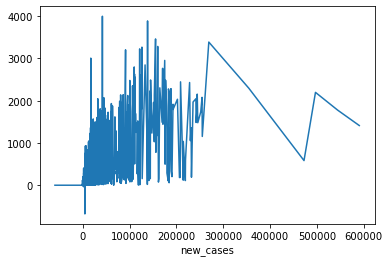

In [20]:
# Ploting avarge dails cases VS avarge dauly deaths
avg_cases = covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.groupby('new_cases')['new_deaths'].agg('mean')
avg_cases.plot()
plt.show()

We can see from the above plot shows that the average daily new cases and new deaths

## Visualize Attributes - Sadik

In the following sections we will use various graphs to show the relationship among attirbutes selected. We will use attribues: new_cases, new_deaths, reproduction_rate, stringency_index, age, diabets_prevalance and new_vaccination smoothed.These attribues can represent overall status of covid data.

In [21]:
covid_data_restricted_dates_no_oceania_and_several_countries_interpolated

,continent,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,new_vaccinations_smoothed,new_people_vaccinated_smoothed,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
493,Asia,Afghanistan,2021-07-01,1557.0,1526.286,91.0,72.857,0.98,14115.0,13654.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
494,Asia,Afghanistan,2021-07-02,1940.0,1509.143,86.0,75.571,0.97,12944.0,12507.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
495,Asia,Afghanistan,2021-07-03,1329.0,1480.143,59.0,73.286,0.95,11773.0,11360.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
496,Asia,Afghanistan,2021-07-04,1263.0,1504.000,92.0,78.429,0.94,10602.0,10212.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
497,Asia,Afghanistan,2021-07-05,1189.0,1455.143,84.0,79.000,0.93,8989.0,8618.0,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154089,Africa,Zimbabwe,2021-12-28,2099.0,1397.143,32.0,17.286,0.79,10056.0,5407.0,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
154090,Africa,Zimbabwe,2021-12-29,0.0,1163.429,0.0,16.000,0.79,9526.0,4796.0,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
154091,Africa,Zimbabwe,2021-12-30,4180.0,1483.429,57.0,20.286,0.82,8399.0,4162.0,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
154092,Africa,Zimbabwe,2021-12-31,1530.0,1503.143,7.0,19.000,0.81,8396.0,4099.0,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571


In the above plot we can see the scatterplot for new cases and new deaths

<AxesSubplot:xlabel='aged_65_older,new_cases'>

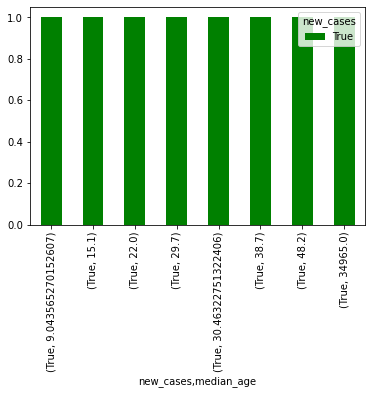

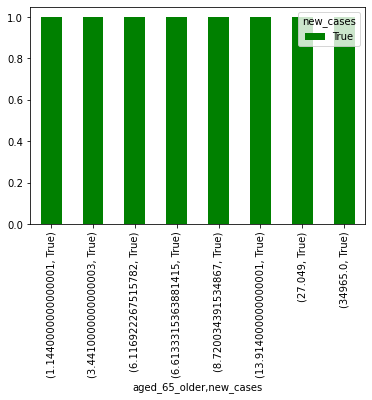

In [22]:
newcases_counts = pd.crosstab([dfstat1['new_cases'],dfstat1['median_age']], dfstat1.new_cases.astype(bool))
newcases_counts.plot(kind='bar', stacked=True, color=['green','red'])

newcases_counts = pd.crosstab([dfstat1['aged_65_older'],dfstat1['new_cases']], dfstat1.new_cases.astype(bool))
newcases_counts.plot(kind='bar', stacked=True, color=['green','red'])



In the above plot we did some cross tabulation between age and new cases. And we can see in the x-axis that the new cases in median age group is higher than that of older ages.

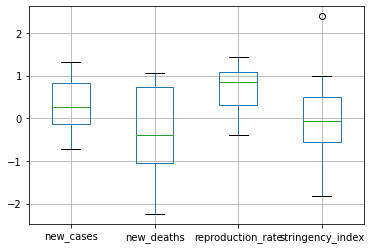

In [23]:
np.random.seed(1234)
dfstat1 = pd.DataFrame(np.random.randn(10, 4),
                  columns=['new_cases', 'new_deaths', 'reproduction_rate', 'stringency_index'])

boxplot = dfstat1.boxplot(column=['new_cases', 'new_deaths', 'reproduction_rate','stringency_index']) 

From the aboave boxplot we can see that the median of reproduction rate lies outside of the box of a comparison box plots that shows there is difference among the variables and we can also see that new deaths box plot has longer box showing the data are more dispressed. The reproduction rate box plot shows there less dispressed

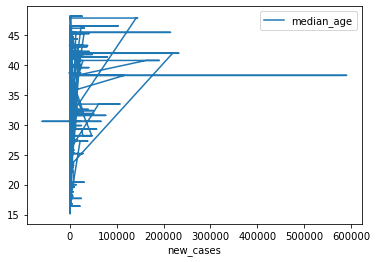

In [24]:
lines = covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.plot.line(x='new_cases', y='median_age')

We can see from the above line graphs, new cases increases is high for peaple age of 35 to 40. This is exepected since there is social interaction and communicatio. 

## Explore Joint Attributes - Dawn


In [25]:
# breaking up the stringency_index variable
covid_data_restricted_dates_no_oceania_and_several_countries_interpolated['stringency_range'] = pd.cut(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.stringency_index,[0,10,20,30,40,50,60,70,80,90,100],10,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']) # creating a new variable
covid_data_restricted_dates_no_oceania_and_several_countries_interpolated.stringency_range.describe()

count     34944
unique       10
top       40-50
freq       9408
Name: stringency_range, dtype: object

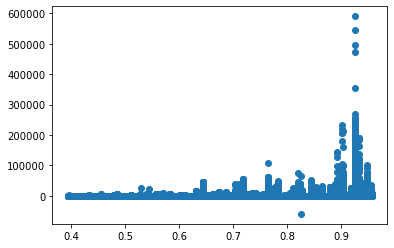

In [26]:
plt.scatter(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["human_development_index"], covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["new_cases"])

>**Human Development index Vs. New Cases**<br>
Comparing the amount of new cases by the the human development index which is a derived measurement of a countrys' human development based on three key dimensions. See more here: http://hdr.undp.org/en/content/human-development-index-hdi,
The lower the index the lower the new cases slowly increasing until you get to about 0.9 in the index, then the new cases increase dramatically.  I am guessing here but the lower indexes might have lower cases because these countries have less people.    

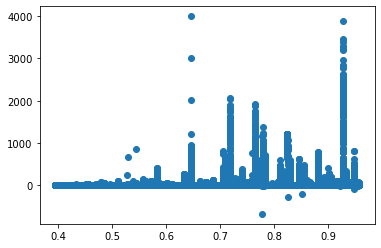

In [27]:
plt.scatter(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["human_development_index"], covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["new_deaths"])

>**Human Development Vs. New Deaths**<br>
Comparing the human development index (HDI) Vs the New Deaths.  See above for more about HDI.  The New Deaths are low for low HDI and slowly increases until about 50 which is the highest then the new deaths decrease until 100.  I think that the new deaths may be low for low HDI because there are fewer people in these countries.  

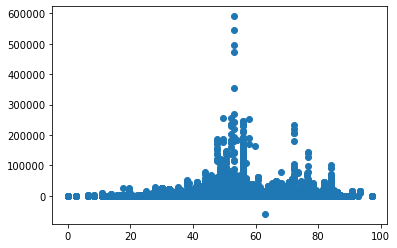

In [28]:
plt.scatter(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["stringency_index"], covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["new_cases"])

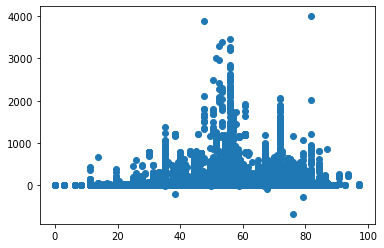

In [29]:
plt.scatter(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["stringency_index"], covid_data_restricted_dates_no_oceania_and_several_countries_interpolated["new_deaths"])

>The stringency index for both new cases and new deaths (above) are similar in that the highest new cases and new deaths are around the middle of the index.  This may be because of population density for the countries with middle stringency.  

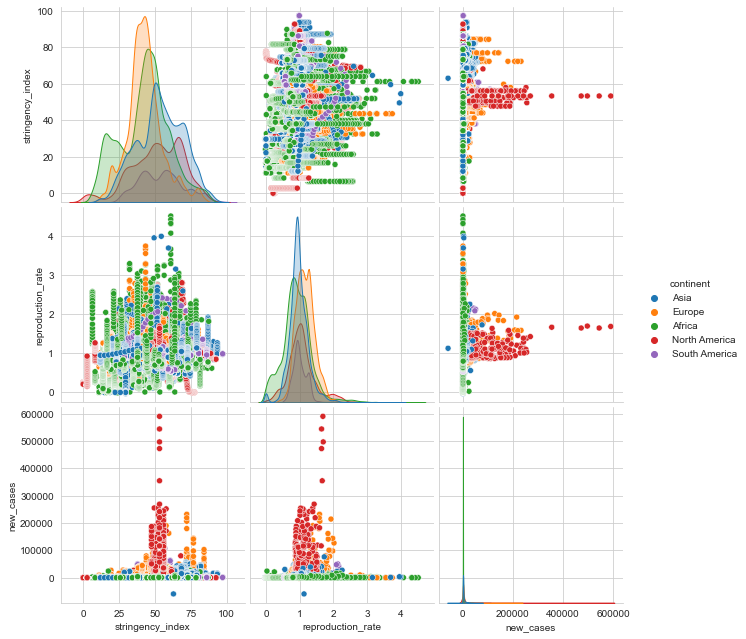

In [30]:
#pairwise scatter plot: Pair-Plot


plt.close();
sns.set_style("whitegrid");
sns.pairplot(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated, vars=["stringency_index","reproduction_rate","new_cases"], hue="continent", height=3);
plt.show()


>Pair plots of stringency index, reproduction rates and new cases colored by continent show that the reproduction rate decreases as the stringency index increases only at the highest levels.  It also shows asia and africa as having the highest reproduction rates and north america as having the highest new cases with a stringency index around 50.  

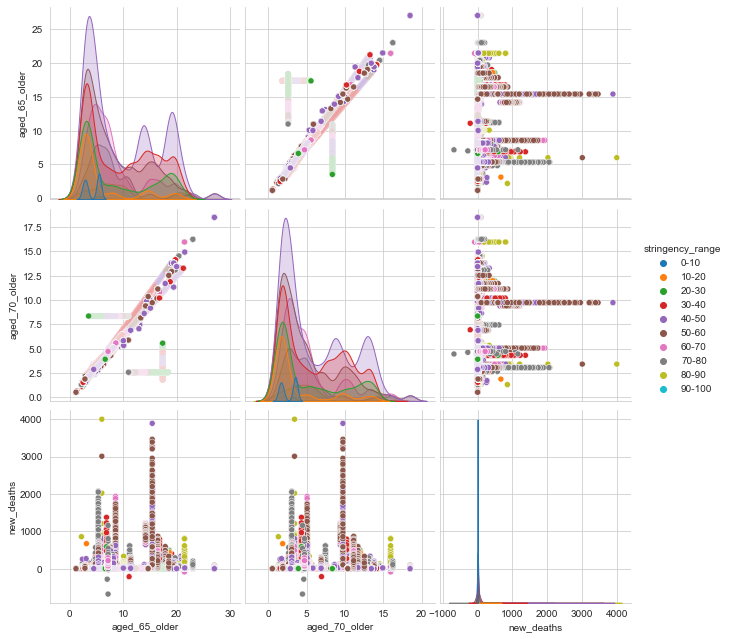

In [31]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated, vars=["aged_65_older","aged_70_older","new_deaths"], hue="stringency_range", height=3);
plt.show()

>You can see from this graph that aged_65_older and aged_70_older are very highly correlated and we probably only need to use one of the attributes in the data.  Also, Most new deaths are around 50-60 stringency rate and about 15% citizens older than 65.  

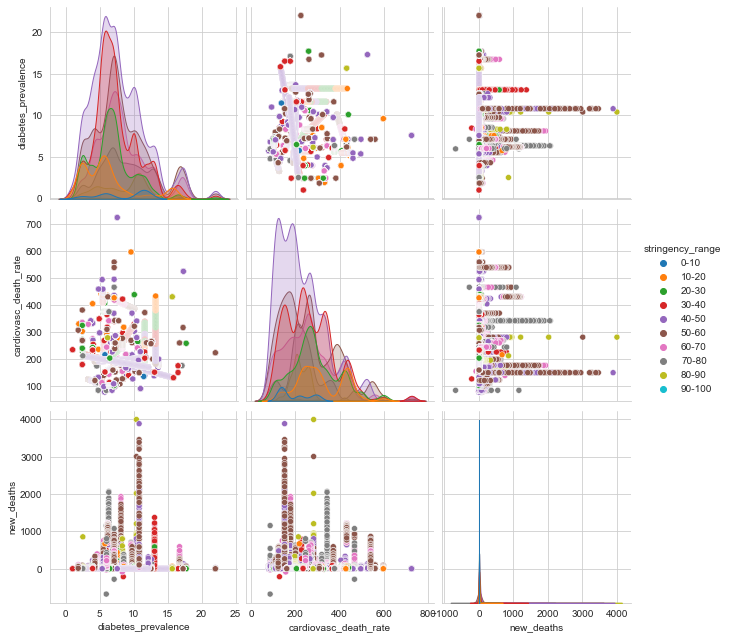

In [32]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated, vars=["diabetes_prevalence","cardiovasc_death_rate","new_deaths"], hue="stringency_range", height=3);
plt.show()

>As you can see in this graph, the new deaths Vs. diabetes_prevalence and the new_deaths Vs. cardiovasc_death_rate are quite different.  Diabetes seems to have somewhat of an effect on the increase in new deaths, however the cardiovasc_death_rate actually looks like it has an inverse relationship with new deaths.  

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(covid_data_restricted_dates_no_oceania_and_several_countries_interpolated, vars=["new_vaccinations_smoothed","new_deaths","new_cases"], hue="stringency_range", height=3);
plt.show()

## Explore Attributes and Class  - Zach 

QUESTION: Classification, continuous variable into level, object.. question mini lab


## New Features - Alex

It would be interesting to have more granular data regarding vaccination. For exmaple, have data about which specific vaccine was administred. Also, it could be interesting to have data about how many patients had different vaccines administred to them, for example, how many people received 2 doses of Pfizer and a booster of Moderna

Notes from class:
"New features": could add 2 existing features together
NOTE THAT THESE ARE THINGS THAT COULD BE IMPLEMENTED FOR LAB 2 (SO DATA HAS TO BE AVAILABLE)


## Exceptional Work